In [1]:
from pymol import cmd
import pandas as pd
import numpy as np
import seaborn as sns
data_path='/Users/vadim/Downloads/'
ps1='380'
ps2='381'
ap1='/B/B/51'
for i in range(1,10):
    cif=data_path+'ps1_app99_'+str(i)+'/fold_ps1_app99_'+str(i)+'_model_0.cif'
    cmd.load(cif,'app'+str(i))
for i in range(1,6):
    cif=data_path+'l166p_app_'+str(i)+'/fold_l166p_app_'+str(i)+'_model_0.cif'
    cmd.load(cif,'l166'+str(i))
for i in range(1,6):
    cif=data_path+'t147i_app_'+str(i)+'/fold_t147i_app_'+str(i)+'_model_0.cif'
    cmd.load(cif,'t147'+str(i))    
for i in range(1,6):
    cif=data_path+'p117l_app_'+str(i)+'/fold_p117l_app_'+str(i)+'_model_0.cif'
    cmd.load(cif,'p117'+str(i))    
for i in range(1,4):
    cif=data_path+'r351_app99_'+str(i)+'/fold_r351_app99_'+str(i)+'_model_0.cif'
    cmd.load(cif,'r35'+str(i));
for i in range(1,4):
    cif=data_path+'e280a_app_'+str(i)+'/fold_e280a_app_'+str(i)+'_model_0.cif'
    cmd.load(cif,'e280'+str(i));        

In [18]:
muts=['l166','t147','p117','e280','r35','app']
sim=[]
for cif in muts:
    dis=[]
    for i in range(1,6):
        try:
            dis1=cmd.get_distance('(/'+cif+str(i)+'///'+ps1+'/cg)','(/'+cif+str(i)+ap1+'/cg)')
            dis2=cmd.get_distance('(/'+cif+str(i)+'///'+ps2+'/cg)','(/'+cif+str(i)+ap1+'/cg)')
            dis.append(round(dis1,2))
            dis.append(round(dis2,2))
        except: continue
    sim.append(dis)

In [19]:
df=pd.DataFrame(sim).T
df.columns=muts
df['s']=[1,2]*5
df.index=[i for i in range(1, 6) for _ in (0, 1)]
df=df.pivot(columns='s',values=muts)
dg=pd.DataFrame(df.mean()).unstack()

In [20]:
dg.columns=['x','y']

<Axes: >

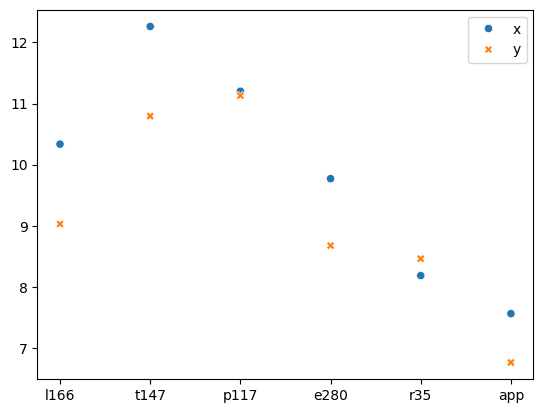

In [22]:
sns.scatterplot(data=dg.loc[muts])